1 Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2 Perform a similar alanlaysis as above on this dataset with the following sections:
3 High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4 Explain our objective.
5 Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6 Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7 Write your observations in english as crisply and unambigously as possible. Always quantify your results.

The objective is to predict wether the patient will survive after 5 years or not, based on Age, Year of treatment and Number of possitive lymph nodes.

**1 environment setup**

In [31]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

**sns.set()** is a function used to control the aesthetics of plots. It applies a default set of visual settings, such as background color, gridlines, and font size, to make plots look more appealing. This function can be customized further with parameters to match specific styles, like **'darkgrid', 'whitegrid', 'dark', 'white', and 'ticks'.**

In [32]:
# load the dataset
df = pd.read_csv('haberman.csv',
                 header= None,
                 names=['Age', 'Year_of_Procedure', 'Number_of_Lymph_nodes','Survival_status_after_5_Years'])

# originally names were not there so given manually

**2 data processing**

In [33]:
df.head()

,Age,Year_of_Procedure,Number_of_Lymph_nodes,Survival_status_after_5_Years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [34]:
df.shape

(306, 4)

In [35]:
df.isnull().sum()

,0
Age,0
Year_of_Procedure,0
Number_of_Lymph_nodes,0
Survival_status_after_5_Years,0


In [36]:
df.duplicated().sum()

np.int64(17)

In [37]:
df.head()

,Age,Year_of_Procedure,Number_of_Lymph_nodes,Survival_status_after_5_Years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Is it possible that 2 patients had the same age in same year and same number of lymph nodes.If we had more details of patients we could have been able to make a decision.

In [38]:
df.Survival_status_after_5_Years.value_counts()

,count
Survival_status_after_5_Years,
1,225
2,81


Survival columns

1 = Survived
2 = Not Survived
we will replace 2 with 0 to make more understanable

In [39]:
df.Survival_status_after_5_Years.replace(2,0, inplace= True)

In [40]:
df.Survival_status_after_5_Years.value_counts()

,count
Survival_status_after_5_Years,
1,225
0,81


In [41]:
df.describe()

,Age,Year_of_Procedure,Number_of_Lymph_nodes,Survival_status_after_5_Years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


Patients age has very wide range from 30 year to 83 years with a median age of 52 years.

Year of procedure from 1958 to 1969.

Number of lymph nodes is right skewed and has from 0 to 52 nodes, but 75 percentile is 4 nodes only.

**3 Univariate Analysis**

3.1 Survival

In [42]:
df.Survival_status_after_5_Years.value_counts()

,count
Survival_status_after_5_Years,
1,225
0,81


In [43]:
df.Survival_status_after_5_Years.value_counts(1)*100

,proportion
Survival_status_after_5_Years,
1,73.529412
0,26.470588


DataSet is imbalanced as 74% people were able to survive after 5 year and 26 were not able to survive after 5 years.

3.2 age

In [44]:
df.Age.skew()

np.float64(0.14650505649010387)

Skewness value of 0.14 indicates a slight positive skew in the data distribution. This means that the tail on the right side of the distribution is slightly longer or heavier than the tail on the left side.

In other words, there are a few relatively large values in the data that are pulling the mean to the right compared to the median. However, the skew is considered mild, as a value of 0.14 is relatively close to 0 (which represents a perfectly symmetrical distribution)

<Axes: xlabel='Age', ylabel='Count'>

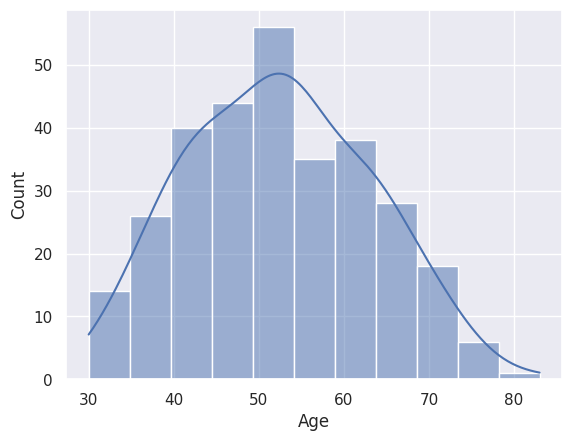

In [45]:
sns.histplot(x='Age', data=df, binwidth=5 , kde=True)

Most patients who had the surgery were between age of 50 to 55.

ECDF Plot, or Empirical Cumulative Distribution Function Plot

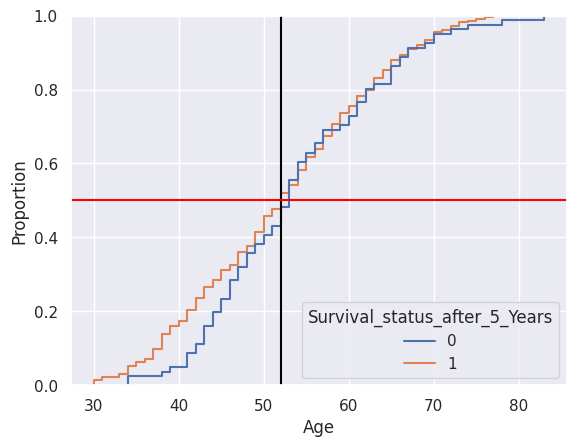

In [46]:
sns.ecdfplot(x='Age', data=df, hue='Survival_status_after_5_Years')
plt.axvline(x=52, color='black')
plt.axhline(y=0.5, color='red')

This tells us that close to 50% of patients who went for procedure were of 52 years or below.

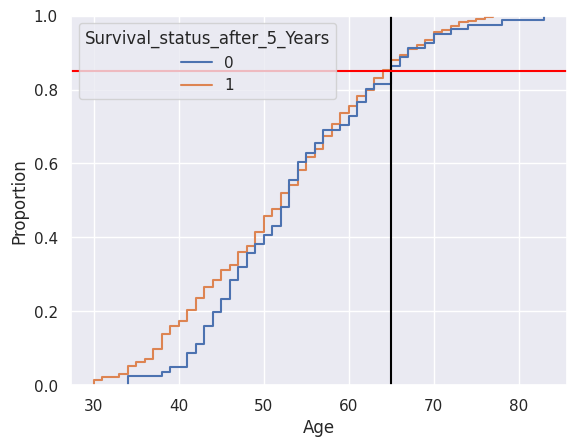

In [47]:
sns.ecdfplot(x='Age', data=df, hue='Survival_status_after_5_Years')
plt.axvline(65, c='black')
plt.axhline(0.85, c='red')

This tells us that close to 85% of patients who went for procedure were of 65 years or below.

3.3 Year

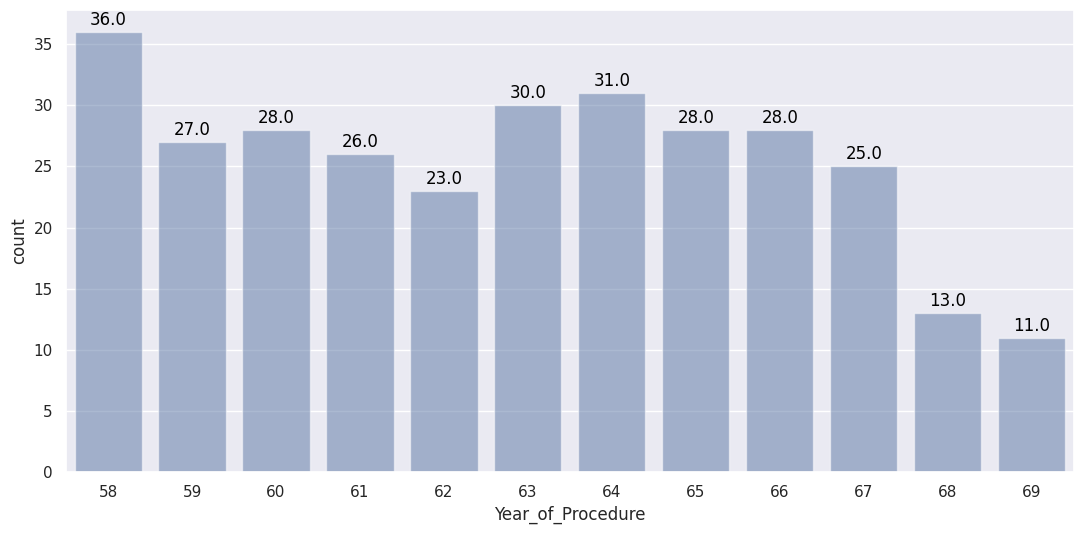

In [48]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x= 'Year_of_Procedure', data=df, alpha=0.5)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), ha='center',
                va='baseline',
                fontsize=12,
                color='black',
                xytext=(0, 5),
                textcoords='offset points')

There are different clusters in this plot,

1958 - maximum number of procedures were performed in this year.

With an expection of 1961, From 1959 to 1967 number of procedures were consistent with range from 25 to 30.

Number of procedure dropped drasticly in 1968 and 1969. This could be due to early awareness, Not many people needed operative treatment.

3.4 Nodes

<Axes: xlabel='Number_of_Lymph_nodes', ylabel='count'>

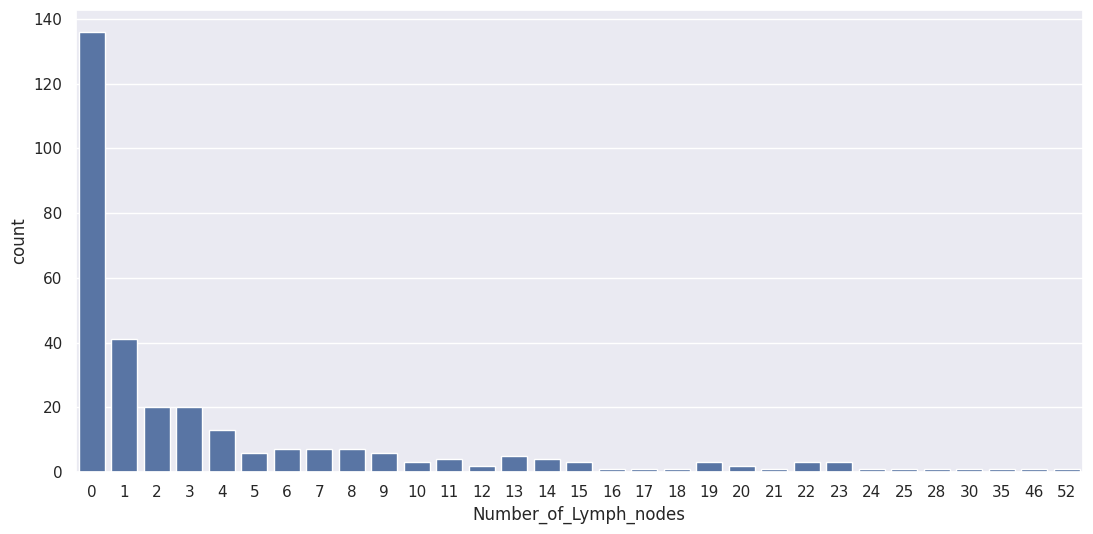

In [49]:
plt.figure(figsize=(13,6))
sns.countplot(x= 'Number_of_Lymph_nodes', data=df)

In [50]:
def nodegroup(node):
  if node < 1:
    return '0'
  elif node >= 1 and node <= 10:
    return '0-10'
  elif node >= 11 and node <= 20:
    return '11-20'
  elif node >= 21 and node <= 25:
    return '21-25'
  elif node >= 26:
    return  '>25'

In [51]:
df['node_group'] = df.Number_of_Lymph_nodes.apply(nodegroup)
df.node_group.value_counts()

,count
node_group,
0,136
0-10,130
11-20,26
21-25,9
>25,5


Text(0, 0.5, 'Number of patients')

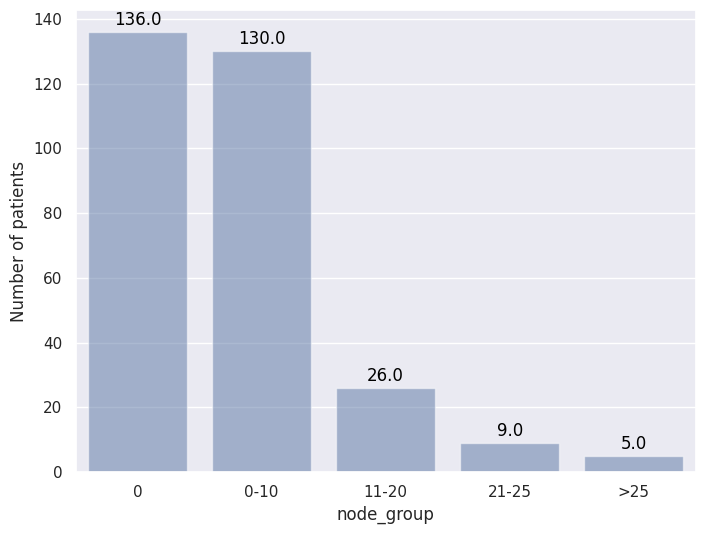

In [52]:
plt.figure(figsize=(8,6))
# Create the countplot with the specified order
ax = sns.countplot(x='node_group', data=df, alpha=0.5, order=['0', '0-10', '11-20', '21-25', '>25'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),textcoords='offset points')

plt.ylabel('Number of patients')

3.5 Distribution plots

**Description**
In a histogram, data points are grouped into intervals or "bins," and the height of each bar represents the number of data points that fall within that bin.

**The Probability Density Function (PDF)** represents the likelihood of a continuous random variable taking a specific value 𝑥. It's a smooth curve that shows where data points are likely to occur within a range of values. Unlike a histogram, which uses bars to represent frequencies in discrete intervals, the PDF gives a continuous view of the data distribution, helping to understand the underlying probability model. The area under the PDF curve between two points represents the probability of the variable falling within that range.

**Kernel Density Estimate (KDE)** is a non-parametric way to estimate the Probability Density Function (PDF) of a continuous random variable. It smooths the data points to produce a continuous curve, providing a more refined view of the data distribution than a histogram. The KDE curve represents the likelihood of different outcomes in the data, and the total area under this curve is always 1, ensuring it represents a valid probability distribution.

Density in the context of a distribution plot (like a KDE plot) refers to the relative likelihood of the data points being found within a particular range of values. It provides a smoothed estimate of the distribution of data.

Calculation:

Histogram: Counts how many data points fall within each bin, then normalizes these counts so that the area under all the bars sums to 1.
KDE (Kernel Density Estimate): Sums up small "bumps" (kernels) placed over each data point. The smooth curve represents where data points are likely to occur, with the area under the curve equaling 1.
Here the height of the bar denotes the percentage of data points under the corresponding group



Plot

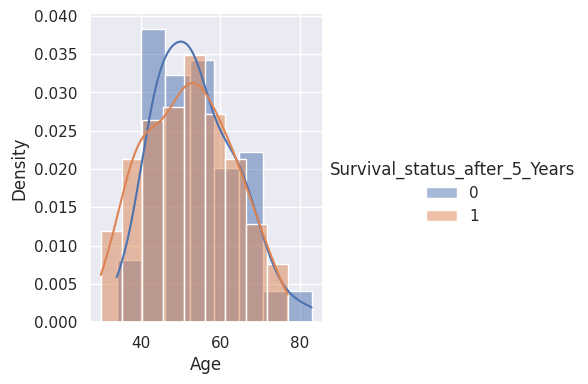

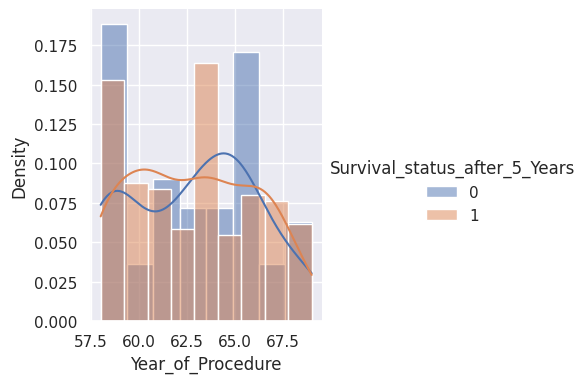

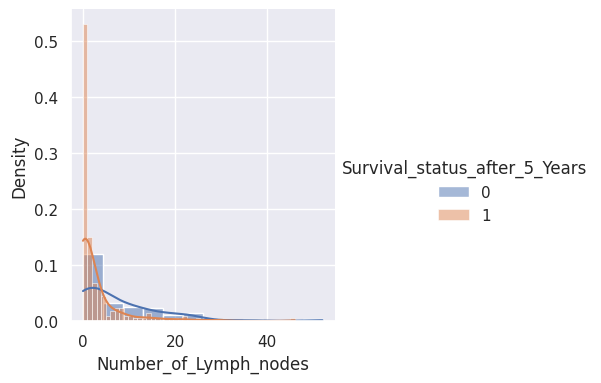

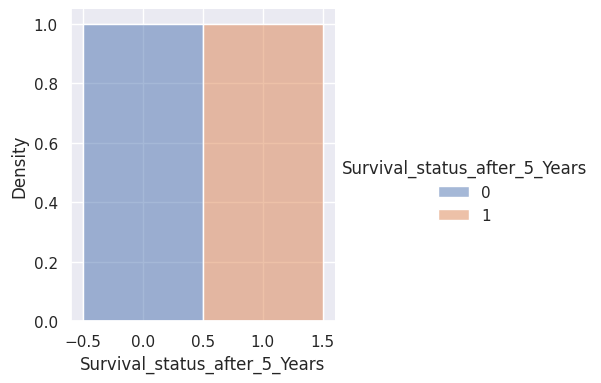

In [53]:
for idx, feature in enumerate(list(df.columns)[:-1]):
  fg = sns.FacetGrid(df, hue='Survival_status_after_5_Years', height = 4)
  fg.map(sns.histplot, feature, kde = True, stat="density").add_legend()
  plt.show()

Looping through all columns in the DataFrame df except the last one. For each feature:

Loop: for idx, feature in enumerate(list(df.columns)[:-1]): iterates over all columns except the last one.

FacetGrid: sns.FacetGrid(df, hue='survival_status_after_5_years', height=4) creates a grid to plot distributions, separated by the survival_status_after_5_years.

Distribution Plot: fg.map(sns.histplot, feature, kde=True, stat="density").add_legend() maps a histogram with KDE to each feature.

Display: plt.show() displays each plot.

This process visualizes the distribution of each feature in relation to the target variable.

5.2 CDF

Description

The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x

1   List item

2   List item



Plot

********* Age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* Year_of_Procedure *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* Number_of_Lymph_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673

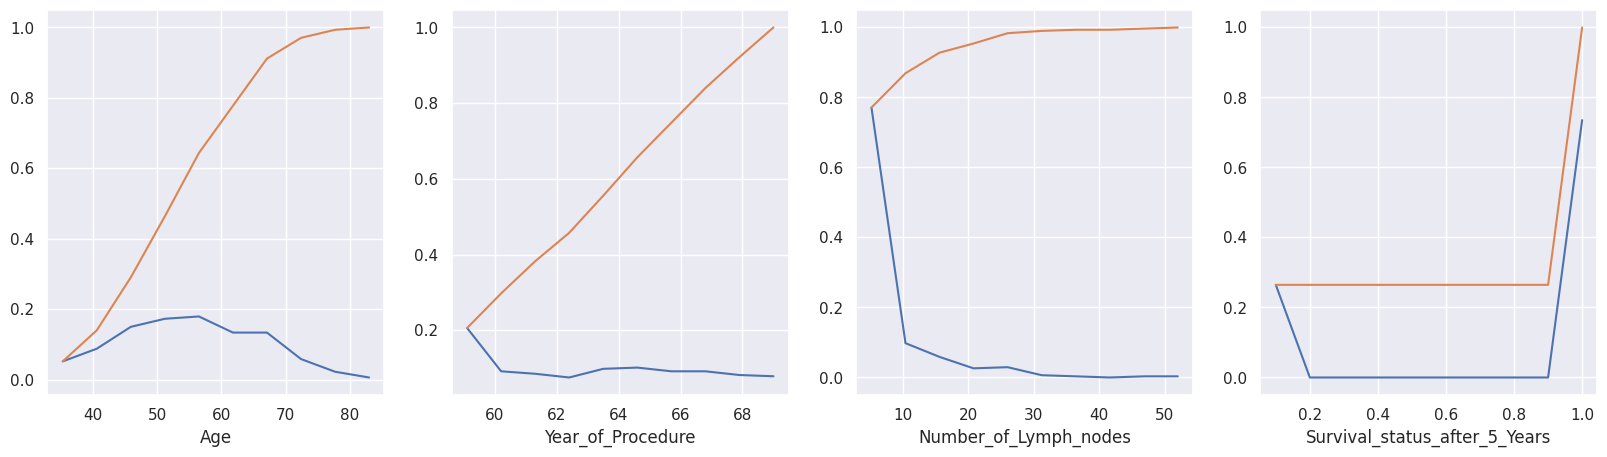

In [54]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 4, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

Box Plots

Description

Box plot takes a less space and visually represents the five number summary of the data points in a box. The outliers are displayed as points outside the box.

Q1 - 1.5*IQR

Q1 (25th percentile)

Q2 (50th percentile or median)

Q3 (75th percentile)

Q3 + 1.5*IQR Inter Quartile Range = Q3 -Q1

IndexError: index 3 is out of bounds for axis 0 with size 3

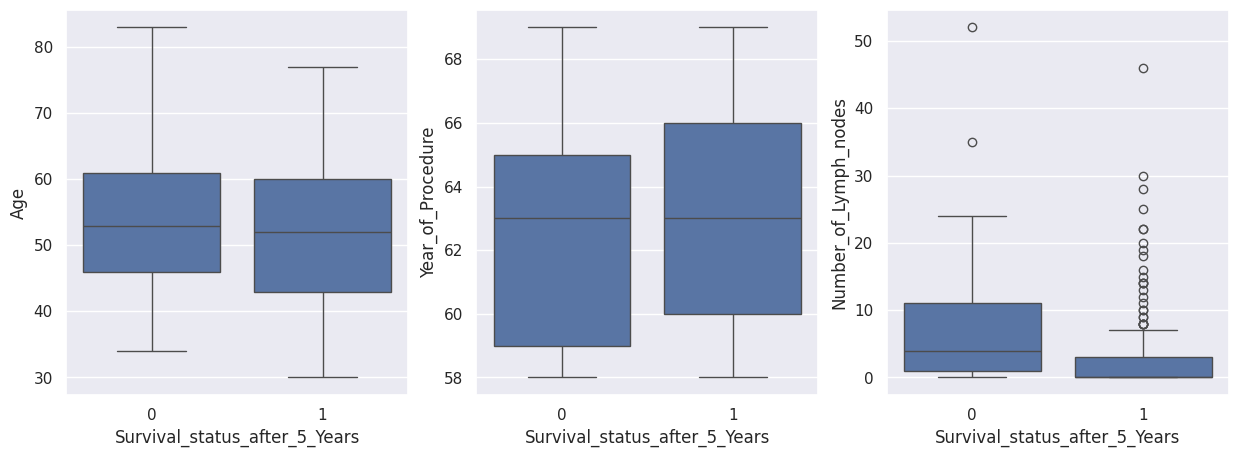

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='Survival_status_after_5_Years', y=feature, data=df, ax=axes[idx])
plt.show()

Violin Plots

Description

Violin plot is the combination of box plot and probability density function.

IndexError: index 3 is out of bounds for axis 0 with size 3

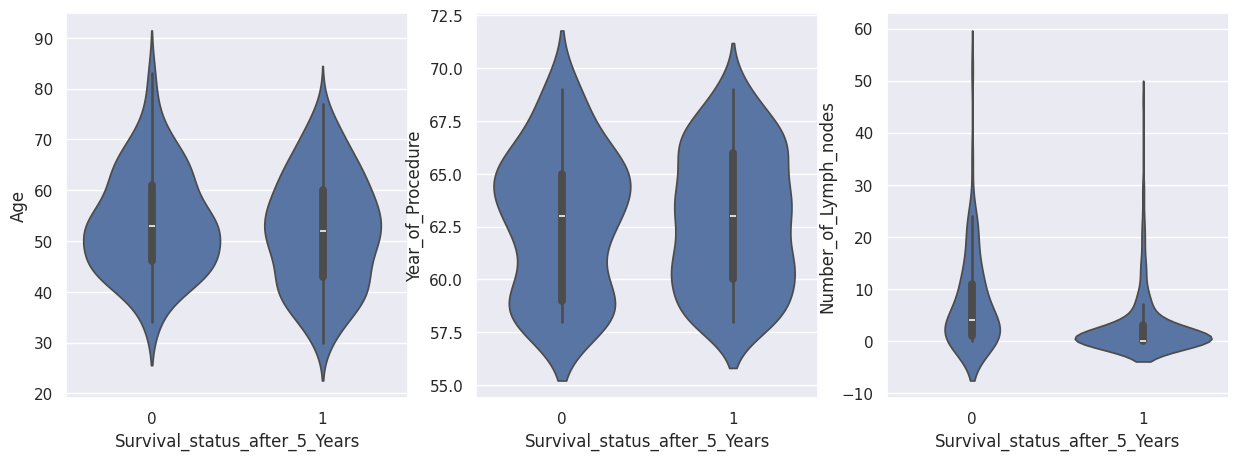

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='Survival_status_after_5_Years', y=feature, data=df, ax=axes[idx])
plt.show()

**4** Bivariate Analysis

In [57]:
df.rename(columns={'Number_of_Lymph_nodes': 'nodes',
                   'Survival_status_after_5_Years' : 'Survival',
                   'Year_of_Procedure':'Year'},
          inplace=True)

In [58]:
df.head()

,Age,Year,nodes,Survival,node_group
0,30,64,1,1,0-10
1,30,62,3,1,0-10
2,30,65,0,1,0
3,31,59,2,1,0-10
4,31,65,4,1,0-10


4.1 Age Survival

Text(0.5, 1.0, '4.1.1')

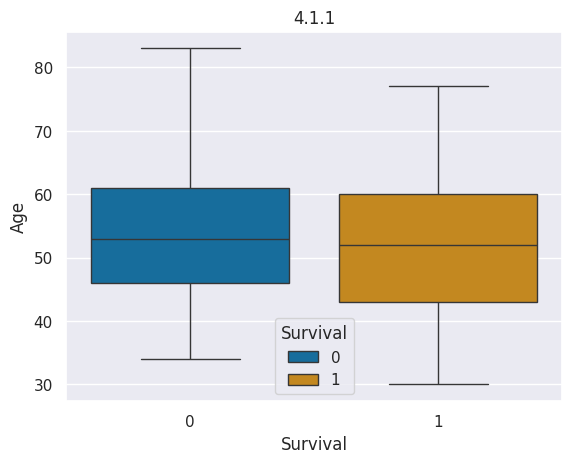

In [59]:
sns.boxplot(x='Survival', y='Age', data=df, hue='Survival', palette='colorblind')
plt.title('4.1.1')

People with age 77 and above had lesser chances of survival.

People with age 35 and below had higher chances of survival.

these observations need more data for confirmation.

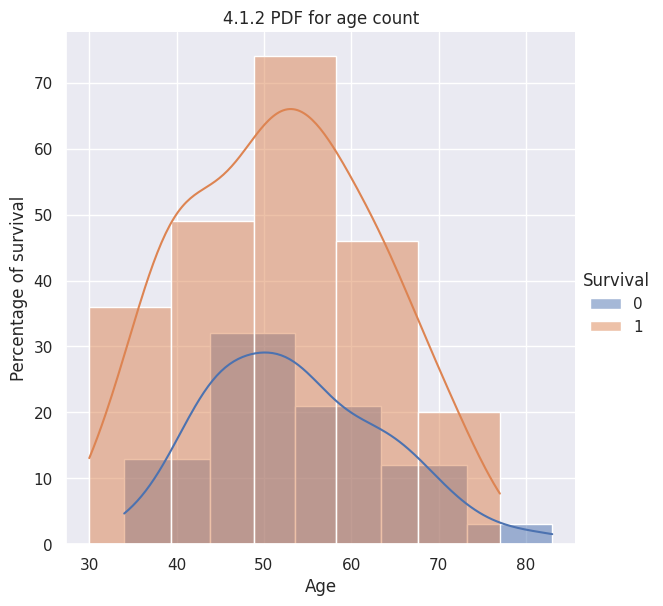

In [60]:
sns.FacetGrid(df, hue='Survival', height=6).map(sns.histplot, 'Age', bins=5, kde=True).add_legend()
plt.xlabel('Age')
plt.ylabel('Percentage of survival')
plt.title('4.1.2 PDF for age count', size=12)
plt.show()

Most patients who could not survive they were of age between 43 to 54.

Maxixmum patients between age of 50 to 58 survived.

In [61]:
df.groupby('Age')['Survival'].value_counts().head()

Age  Survival
30   1           3
31   1           2
33   1           2
34   1           5
     0           2
Name: count, dtype: int64

In [62]:
age_count = df.groupby('Age')['Survival'].value_counts().unstack(fill_value= 0)
df_new = pd.DataFrame({
    'Age' : age_count.index,
    'Total_patients': age_count.sum(axis=1),
    'Count_of_Survived':age_count[1],
    'Count_of_Not_Survived':age_count[0]
})

df_new = df_new.reset_index(drop=True)

df_new['Survival_Percentage'] = round(df_new['Count_of_Survived']/df_new['Total_patients']*100,2)

df_new.head()

,Age,Total_patients,Count_of_Survived,Count_of_Not_Survived,Survival_Percentage
0,30,3,3,0,100.00
1,31,2,2,0,100.00
2,33,2,2,0,100.00
3,34,7,5,2,71.43
4,35,2,2,0,100.00


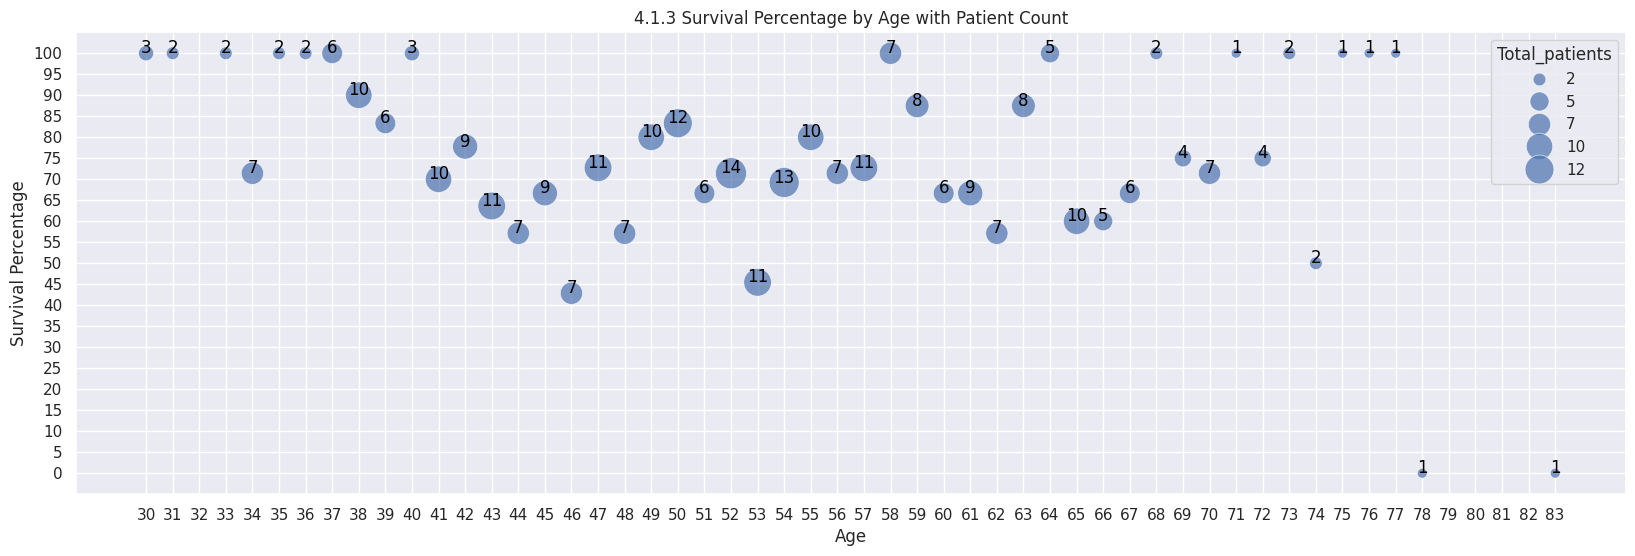

In [63]:
# Sort the DataFrame by 'Survival_Percentage' in descending order
df_new = df_new.sort_values('Survival_Percentage', ascending=False)

# Create the scatter plot with bubble size based on 'Total_patients'
plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(x='Age', y='Survival_Percentage', size='Total_patients', data=df_new, sizes=(50, 500), alpha=0.7)

# Add count labels to the bubbles
for line in range(0, df_new.shape[0]):
    scatter.text(df_new.Age[line], df_new.Survival_Percentage[line], df_new.Total_patients[line], horizontalalignment='center', size='medium', color='black')
plt.xticks(np.arange(df_new['Age'].min(), df_new['Age'].max()+1, 1))  # Set x-ticks to show all ages
plt.yticks(np.arange(0, 101, 5))
plt.xlabel('Age')
plt.ylabel('Survival Percentage')
plt.title('4.1.3 Survival Percentage by Age with Patient Count')
plt.show()

maximum people who could not survive beyond 5 year were from age range 41 to 57.

Although the plot suggests that people of age 78 and above were not able to survive after 5 years, but we have very less data to make statement.

With few exeptions, chances of survival stayed in range of 45 to 90 percent for age range 38 to 77.

4.2 Node Survival

In [64]:
node_groups_survival = df.groupby('node_group')['Survival'].value_counts().unstack()
df_nodes = pd.DataFrame({
    'Node_Group': node_groups_survival.index,
    'Survived':node_groups_survival[1],
    'Not_Survived':node_groups_survival[0],
})
df_nodes = df_nodes.reset_index(drop=True)

df_nodes['Total_Patients'] = df_nodes['Survived']+df_nodes['Not_Survived']

df_nodes['Survival_Percentage'] = round((df_nodes['Survived']/(df_nodes['Survived']+df_nodes['Not_Survived'])*100),2)

df_nodes.head()

,Node_Group,Survived,Not_Survived,Total_Patients,Survival_Percentage
0,0,117,19,136,86.03
1,0-10,91,39,130,70.00
2,11-20,11,15,26,42.31
3,21-25,3,6,9,33.33
4,>25,3,2,5,60.00


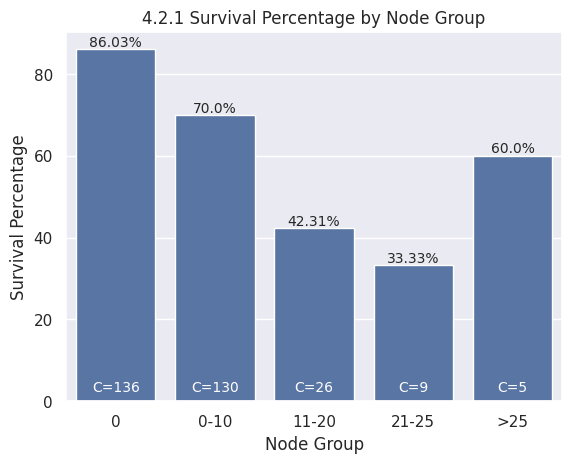

In [65]:
# Create the bar plot
ax = sns.barplot(x='Node_Group', y='Survival_Percentage', data=df_nodes)

# Add survival percentage at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

# Add number of patients at the bottom of each bar
for i, row in df_nodes.iterrows():
    ax.text(i, 5, f"C={row['Total_Patients']}", ha='center', va='top', fontsize=10, color='white')

plt.xlabel('Node Group')
plt.ylabel('Survival Percentage')
plt.title('4.2.1 Survival Percentage by Node Group')
plt.show()

Number of nodes have a high impact on survival. Survival is higher for patient with lesser number of nodes.

We could not make a statement about patient with greater than 25 nodes, as the data is very less.

4.3 Year Survival

In [66]:
year_survival = df[['Year','Survival']].groupby('Year').value_counts().unstack()
df_ys = pd.DataFrame({
    'Year': year_survival.index,
    'Survived':year_survival[1],
    'Not_Survived':year_survival[0],
})
df_ys = df_ys.reset_index(drop=True)
df_ys.head()

,Year,Survived,Not_Survived
0,58,24,12
1,59,18,9
2,60,24,4
3,61,23,3
4,62,16,7


In [67]:
df_ys['Total_Patients'] = df_ys['Survived']+df_ys['Not_Survived']
df_ys['Survival_Percentage'] = round((df_ys['Survived']/(df_ys['Survived']+df_ys['Not_Survived'])*100),2)
df_ys.head()

,Year,Survived,Not_Survived,Total_Patients,Survival_Percentage
0,58,24,12,36,66.67
1,59,18,9,27,66.67
2,60,24,4,28,85.71
3,61,23,3,26,88.46
4,62,16,7,23,69.57


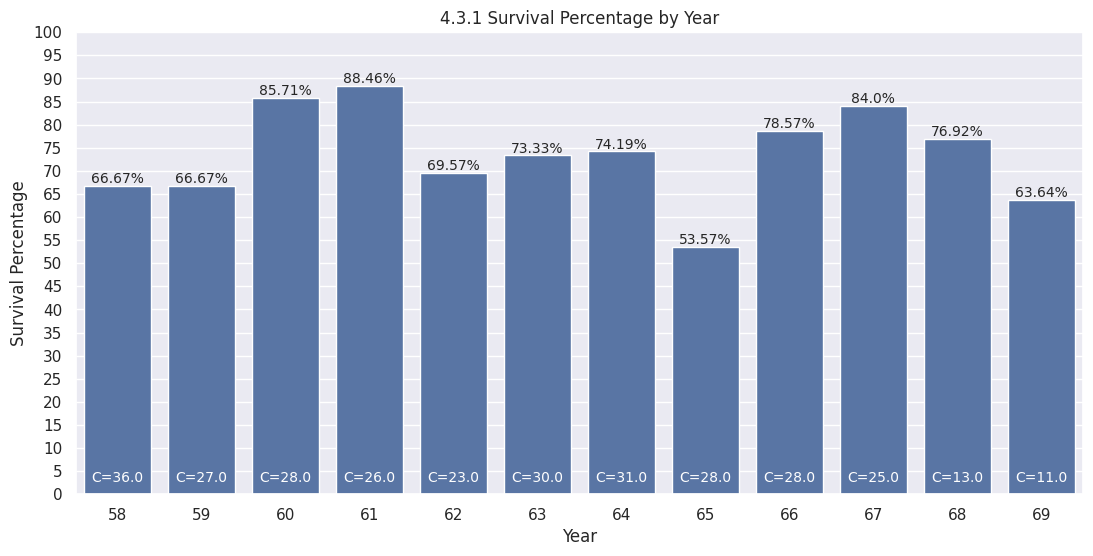

In [68]:
plt.figure(figsize=(13,6))
# Create the bar plot
ax = sns.barplot(x='Year', y='Survival_Percentage', data=df_ys)

# Add survival percentage at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

# Add number of patients at the bottom of each bar
for i, row in df_ys.iterrows():
    ax.text(i, 5, f"C={row['Total_Patients']}", ha='center', va='top', fontsize=10, color='white')

plt.yticks(np.arange(0, 101, 5))
plt.xlabel('Year')
plt.ylabel('Survival Percentage')
plt.title('4.3.1 Survival Percentage by Year')
plt.show()

With a dip in 1965, survival percentage stayed between 70 to 88 percent from year 1960 to 1968. This shows early awareness of the disease.

Early awareness could be an impact of feminin movement in US in 1960's.

4.4 Age Node

In [69]:
df.head()

,Age,Year,nodes,Survival,node_group
0,30,64,1,1,0-10
1,30,62,3,1,0-10
2,30,65,0,1,0
3,31,59,2,1,0-10
4,31,65,4,1,0-10


In [70]:
df_an = df[['Age', 'nodes']].groupby('Age').mean('nodes')

In [71]:
df_age_nodes = pd.DataFrame({
    'Age' : df_an.index,
    'Avg_nodes' : round(df_an['nodes'],2)
})
df_age_nodes = df_age_nodes.reset_index(drop=True)
df_age_nodes.head()

,Age,Avg_nodes
0,30,1.33
1,31,3.00
2,33,5.00
3,34,8.14
4,35,6.50


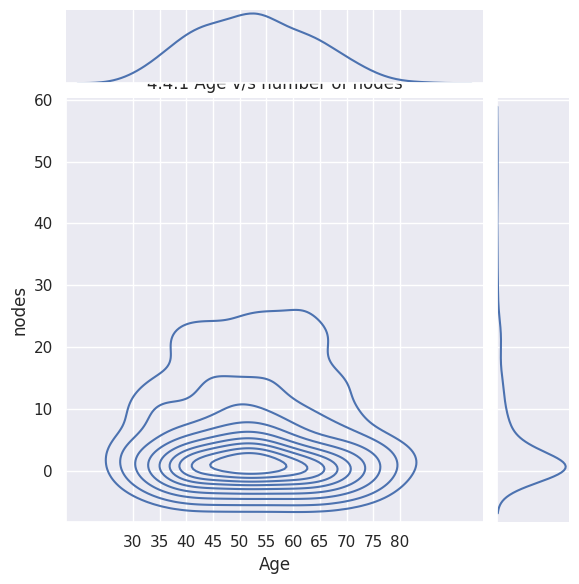

In [72]:
sns.jointplot(x='Age', y='nodes', data=df, kind='kde')
plt.xticks(np.arange(df_new['Age'].min(), df_new['Age'].max()+1, 5))
plt.title('4.4.1 Age v/s number of nodes')
plt.show()

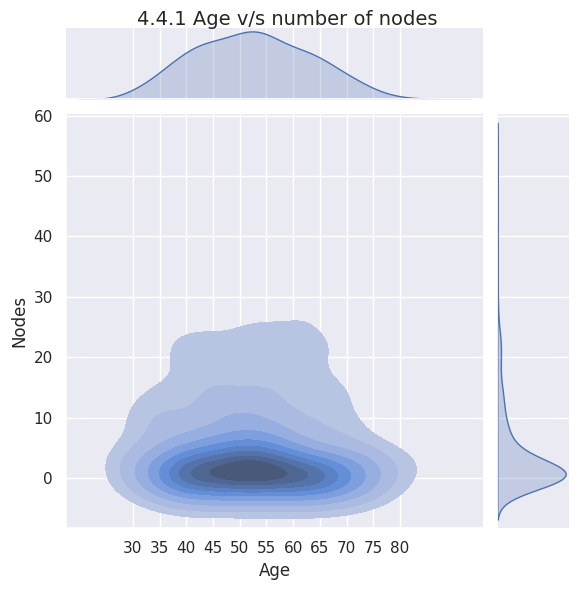

In [73]:
# KDE Jointplot for Age vs nodes
g = sns.jointplot(x='Age', y='nodes', data=df, kind='kde', fill=True)

# Set custom x-ticks
g.ax_joint.set_xticks(np.arange(df['Age'].min(), df['Age'].max() + 1, 5))

# Set axis labels (optional if needed)
g.set_axis_labels("Age", "Nodes")

# Set the main title
plt.suptitle('4.4.1 Age v/s number of nodes', fontsize=14)
plt.subplots_adjust(top=0.95)  # adjust space for title

plt.show()

Text(0.5, 1.0, '4.4.2 Age v/s number of nodes')

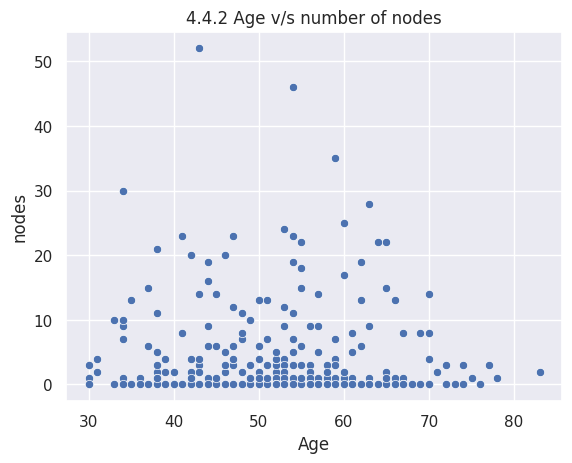

In [74]:
sns.scatterplot(x='Age', y='nodes', data=df)
plt.title('4.4.2 Age v/s number of nodes')

4.5 Year Node

Text(0.5, 1.0, '4.5.1 year v/s nodes')

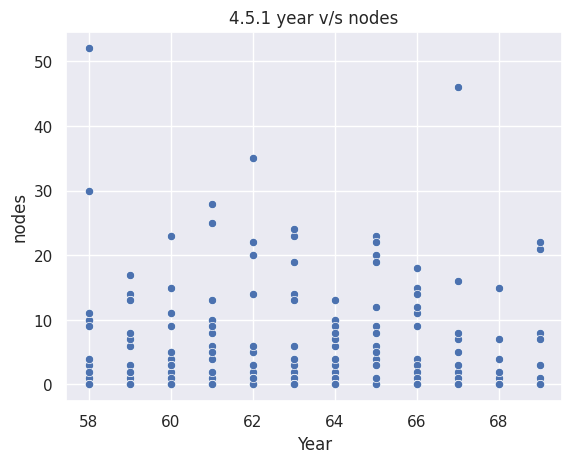

In [75]:
sns.scatterplot(x='Year', y='nodes', data=df)
plt.title('4.5.1 year v/s nodes')

4.6 Age Year

In [76]:
df_ay = df.groupby('Year')['Age'].value_counts().unstack(fill_value=0)

df_ay['sum'] = df_ay.sum(axis=1)

df_age_year = pd.DataFrame({
    'Year' : df_ay.index,
    'Num_of_Patients' : df_ay['sum']
})

df_age_year.reset_index(drop=True, inplace=True)

In [77]:
df_age_year.head()

,Year,Num_of_Patients
0,58,36
1,59,27
2,60,28
3,61,26
4,62,23


Text(0.5, 1.0, '4.6.1 Year wise number of petients')

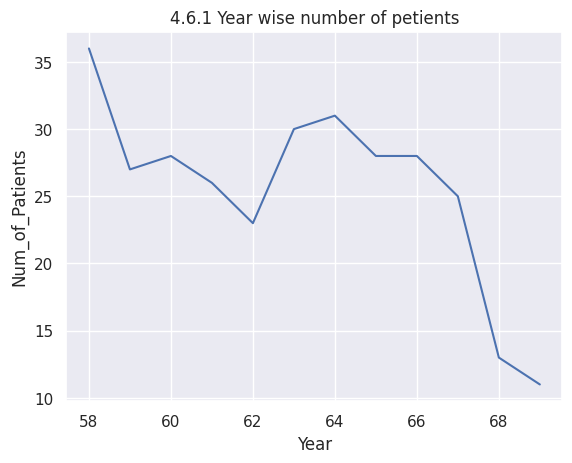

In [78]:
sns.lineplot(x='Year', y='Num_of_Patients', data=df_age_year)
plt.title('4.6.1 Year wise number of petients')

**5 Multivariate Analysis**

In [79]:
df.head()

,Age,Year,nodes,Survival,node_group
0,30,64,1,1,0-10
1,30,62,3,1,0-10
2,30,65,0,1,0
3,31,59,2,1,0-10
4,31,65,4,1,0-10


In [80]:
df.drop('node_group', axis=1, inplace=True)

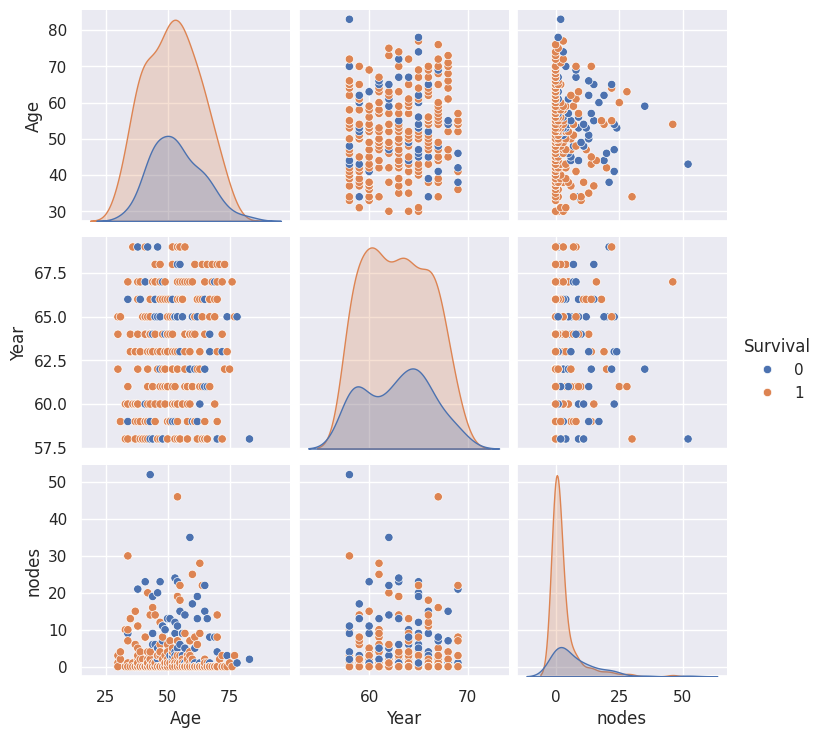

In [81]:
sns.pairplot(df, hue='Survival')

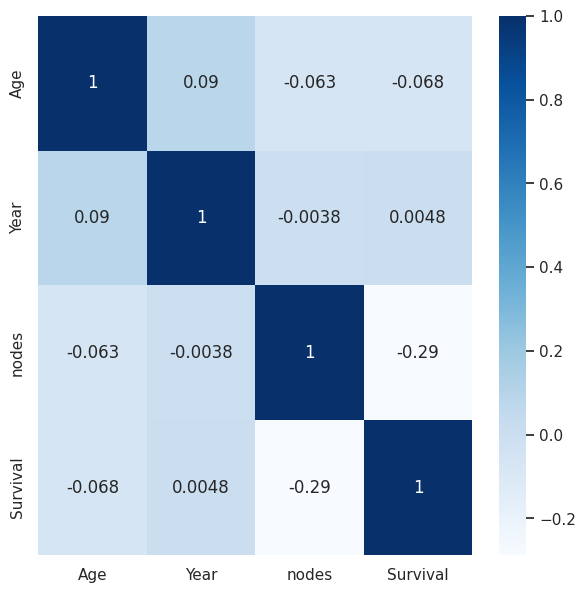

In [82]:
plt.figure(figsize=(7,7))
corr = df.corr()
sns.heatmap(corr, xticklabels=df.columns, yticklabels=df.columns, cmap='Blues', annot=True);